In [1]:
import os
dataset_path=r"C:\Users\DELL\Downloads\Animal and Bird Dataset"
categories=os.listdir(dataset_path)
print(categories)

['Bird', 'Cat', 'Deer', 'Dog', 'Duck', 'Frog', 'Goat', 'Horse', 'Lion', 'Tiger']


In [2]:
img_path=[]
labels=[]
for category in categories:
    folder_path=os.path.join(dataset_path,category)
    for file in os.listdir(folder_path):
        file_path=os.path.join(folder_path,file)
        img_path.append(file_path)
        labels.append(category)

In [3]:
img_path[-5:]

['C:\\Users\\DELL\\Downloads\\Animal and Bird Dataset\\Tiger\\5.jpg',
 'C:\\Users\\DELL\\Downloads\\Animal and Bird Dataset\\Tiger\\6.jpg',
 'C:\\Users\\DELL\\Downloads\\Animal and Bird Dataset\\Tiger\\7.jpg',
 'C:\\Users\\DELL\\Downloads\\Animal and Bird Dataset\\Tiger\\8.jpg',
 'C:\\Users\\DELL\\Downloads\\Animal and Bird Dataset\\Tiger\\9.jpg']

In [4]:
labels[-5:]

['Tiger', 'Tiger', 'Tiger', 'Tiger', 'Tiger']

In [5]:
len(labels)

300

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(img_path,labels,test_size=0.2,random_state=42)

In [7]:
list(enumerate(categories))

[(0, 'Bird'),
 (1, 'Cat'),
 (2, 'Deer'),
 (3, 'Dog'),
 (4, 'Duck'),
 (5, 'Frog'),
 (6, 'Goat'),
 (7, 'Horse'),
 (8, 'Lion'),
 (9, 'Tiger')]

In [8]:
label_map={}

for id,category in enumerate(categories):
    label_map.update({category:id})
print(label_map)

{'Bird': 0, 'Cat': 1, 'Deer': 2, 'Dog': 3, 'Duck': 4, 'Frog': 5, 'Goat': 6, 'Horse': 7, 'Lion': 8, 'Tiger': 9}


In [9]:
y_train[:5]

['Horse', 'Cat', 'Bird', 'Goat', 'Frog']

In [10]:
y_train1=[]
for i in y_train:
    y_train1.append(label_map[i])

In [11]:
y_train1[:5]

[7, 1, 0, 6, 5]

In [12]:
y_test1=[]
for i in y_test:
    y_test1.append(label_map[i])

In [13]:
y_test1[:5]

[6, 8, 5, 0, 7]

In [14]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np

def preprocess_image(img_path):
    img=load_img(img_path,target_size=(150,150))
    img_array=img_to_array(img)
    img_array=img_array/255.0
    return img_array

In [15]:
y=preprocess_image(img_path[0])
y.shape

(150, 150, 3)

In [16]:
y

array([[[0.49411765, 0.48235294, 0.3137255 ],
        [0.49803922, 0.4862745 , 0.31764707],
        [0.5058824 , 0.49411765, 0.3254902 ],
        ...,
        [0.4627451 , 0.5019608 , 0.29411766],
        [0.45882353, 0.49803922, 0.2901961 ],
        [0.45882353, 0.49803922, 0.2901961 ]],

       [[0.49411765, 0.48235294, 0.3137255 ],
        [0.49803922, 0.4862745 , 0.31764707],
        [0.5058824 , 0.49411765, 0.3254902 ],
        ...,
        [0.4627451 , 0.5019608 , 0.29411766],
        [0.45882353, 0.49803922, 0.2901961 ],
        [0.45882353, 0.49803922, 0.2901961 ]],

       [[0.49411765, 0.48235294, 0.3137255 ],
        [0.49803922, 0.4862745 , 0.31764707],
        [0.5058824 , 0.49411765, 0.3254902 ],
        ...,
        [0.4627451 , 0.5019608 , 0.29411766],
        [0.45882353, 0.49803922, 0.2901961 ],
        [0.45882353, 0.49803922, 0.2901961 ]],

       ...,

       [[0.5882353 , 0.54509807, 0.36862746],
        [0.5882353 , 0.54509807, 0.36862746],
        [0.5921569 , 0

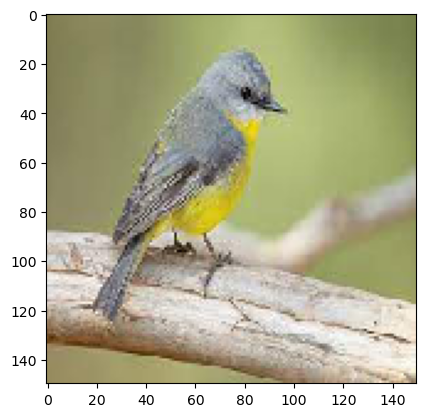

In [17]:
import matplotlib.pyplot as plt
plt.imshow(y)

In [18]:
x_train_new=[]
for i in x_train:
    x_train_new.append(preprocess_image(i))

In [19]:
x_train_new=np.array(x_train_new)
x_train_new.shape

(240, 150, 150, 3)

In [20]:
x_test_new=[]
for i in x_test:
    x_test_new.append(preprocess_image(i))

In [21]:
x_test_new=np.array(x_test_new)
x_test_new.shape

(60, 150, 150, 3)

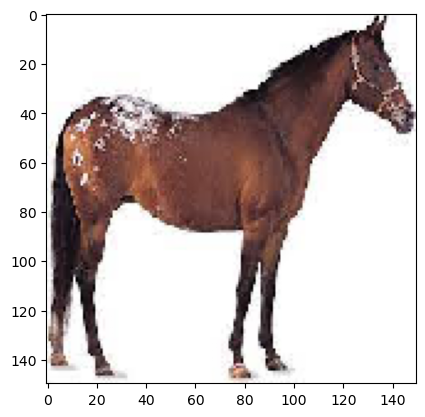

In [22]:
plt.imshow(x_train_new[0])

Build a CNN Model

In [23]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)), 
    keras.layers.MaxPooling2D((2,2)), 

    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'), 
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(len(categories),activation='softmax')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(x_train_new,np.array(y_train1),epochs=10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.0669 - loss: 4.3057
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.0788 - loss: 2.2914
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.1573 - loss: 2.2957
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.1679 - loss: 2.2703
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.1346 - loss: 2.2728
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.1631 - loss: 2.2498
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.1939 - loss: 2.2193
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.2548 - loss: 2.1722
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.2299 - loss: 2.1582
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.2015 - loss: 2.1425


In [26]:
model.evaluate(x_test_new,np.array(y_test1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.1299 - loss: 2.2947 


[2.294989585876465, 0.11666666716337204]

Prediction with single image

In [27]:
#if we have not done preprocess_image before then,
#img=load_img(img_path,target_size=(150,150))
#img_array=img_to_array(img)
#y_pred=img_array/255.0

In [28]:
img_path=r'C:\Users\DELL\Downloads\Animal and Bird Dataset\Bird\10.jpg'
y_pred=preprocess_image(img_path)
y_pred

array([[[0.92156863, 0.9254902 , 0.94509804],
        [0.7647059 , 0.78431374, 0.69411767],
        [0.56078434, 0.6117647 , 0.32941177],
        ...,
        [0.27058825, 0.34901962, 0.        ],
        [0.30588236, 0.3529412 , 0.03137255],
        [0.30588236, 0.3529412 , 0.03137255]],

       [[0.9137255 , 0.91764706, 0.93333334],
        [0.7490196 , 0.77254903, 0.67058825],
        [0.54901963, 0.6       , 0.3254902 ],
        ...,
        [0.3019608 , 0.36862746, 0.        ],
        [0.30980393, 0.35686275, 0.02745098],
        [0.30980393, 0.35686275, 0.02745098]],

       [[0.87058824, 0.88235295, 0.85490197],
        [0.7058824 , 0.7294118 , 0.61960787],
        [0.5372549 , 0.58431375, 0.34117648],
        ...,
        [0.34117648, 0.39607844, 0.02352941],
        [0.32941177, 0.38431373, 0.        ],
        [0.32941177, 0.38431373, 0.        ]],

       ...,

       [[0.48235294, 0.5686275 , 0.07058824],
        [0.47058824, 0.5568628 , 0.0627451 ],
        [0.44705883, 0

In [29]:
y_prediction=model.predict(np.array([y_pred]))
y_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[0.12469225, 0.0594951 , 0.10819156, 0.11723629, 0.08709899,
        0.14526561, 0.13005711, 0.0653567 , 0.08269355, 0.07991279]],
      dtype=float32)

Text(0.5, 1.0, 'Frog')

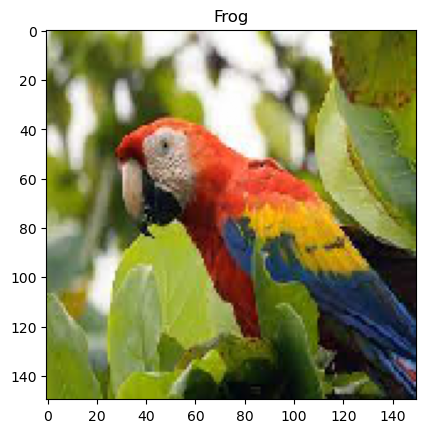

In [30]:
plt.imshow(y_pred)
plt.title(categories[np.argmax(y_prediction)])

Making Predictions with 5 images

In [31]:
img_path = [
    r"C:\Users\DELL\Downloads\Animal and Bird Dataset\Cat\15.jpg",
    r"C:\Users\DELL\Downloads\Animal and Bird Dataset\Deer\14.jpg",
    r"C:\Users\DELL\Downloads\Animal and Bird Dataset\Duck\10.jpg",
    r"C:\Users\DELL\Downloads\Animal and Bird Dataset\Goat\18.jpg",
    r"C:\Users\DELL\Downloads\Animal and Bird Dataset\Lion\20.jpg"
]

model_pred = []

for i in img_path:
    y_pred = preprocess_image(i)
    y_prediction=model.predict(np.array([y_pred]))
    model_pred.append(categories[np.argmax(y_prediction)])
model_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


['Duck', 'Tiger', 'Duck', 'Goat', 'Frog']

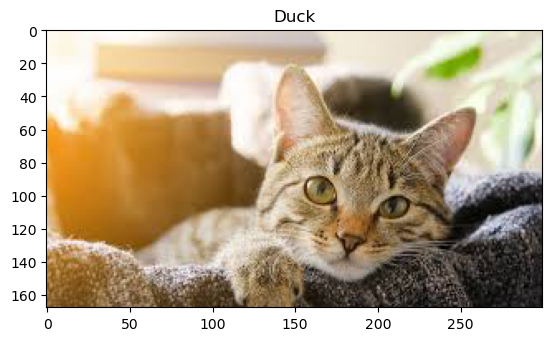

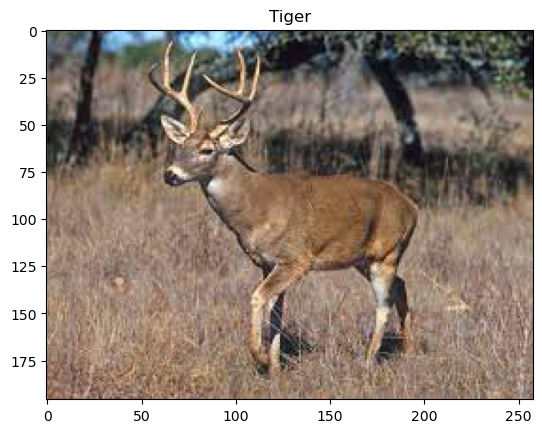

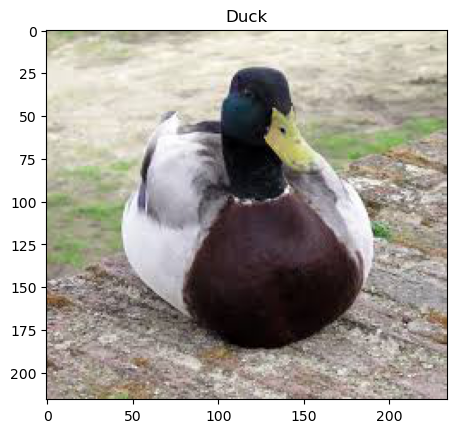

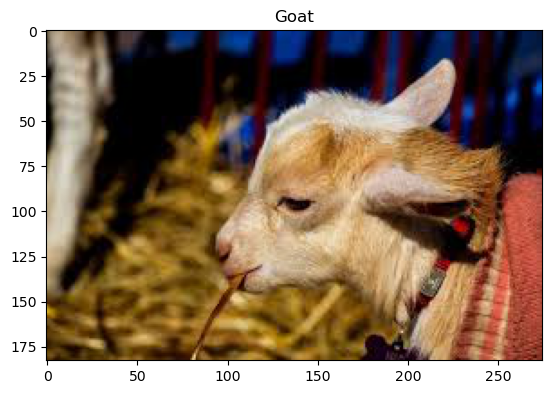

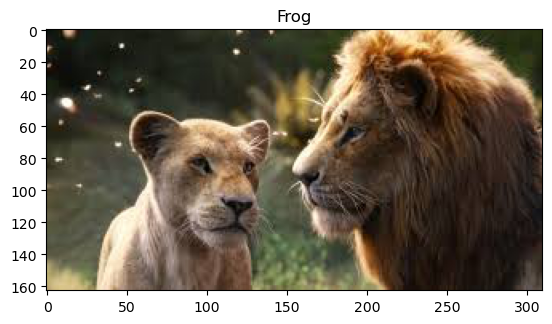

In [32]:
for i in range(len(img_path)):
    img=load_img(img_path[i])
    plt.imshow(img)
    plt.title(model_pred[i])
    plt.show()